In [1]:
# Comparing OSPEX fits to the RHESSI microflares using 
# fvth + bpow vs fvth + thick2
# 
# And also looking at the effect of the different CHIANTI thermal models.
#  
# 05-Jul-2024   IGH
# 29-Jan-2026   Fixed inf issue with numpy and EM values


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14
plt.rc('font', family='Whitney HTF', weight='normal', size=14)
plt.rcParams['mathtext.fontset'] = 'stixsans'
# plt.rc('font', family='STIXGeneral', weight='normal', size=14)
# plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Ubuntu",'mathtext.default':"regular"})

In [3]:
plt.rc('font', family='sans-serif', weight='normal', size=18)

In [4]:
# from matplotlib import font_manager
# font_manager.get_font_names()

In [5]:
# Load in the results files
b05=read_genx('wee_2024_vth52_bpow.genx')
t05=read_genx('wee_2024_vth52_tt.genx')
t07=read_genx('wee_2024_vth71_tt.genx')
t10=read_genx('wee_2024_vth101_t71_tt.genx')

In [6]:
# Restructure things to make it easier to work with
tmk_b05=np.array([r["OSX_P"][1] for r in b05["SAVEGEN0"]])
em_b05=np.array([r["OSX_P"][0].astype(np.float64)*1e49 for r in b05["SAVEGEN0"]])
gam_b05=np.array([r["OSX_P"][6] for r in b05["SAVEGEN0"]])
eb_b05=np.array([r["OSX_P"][5] for r in b05["SAVEGEN0"]])

tmk_t05=np.array([r["OSX_P"][1] for r in t05["SAVEGEN0"]])
em_t05=np.array([r["OSX_P"][0].astype(np.float64)*1e49 for r in t05["SAVEGEN0"]])
del_t05=np.array([r["OSX_P"][4] for r in t05["SAVEGEN0"]])
ec_t05=np.array([r["OSX_P"][7] for r in t05["SAVEGEN0"]])

tmk_t10=np.array([r["OSX_P"][1] for r in t10["SAVEGEN0"]])
em_t10=np.array([r["OSX_P"][0].astype(np.float64)*1e49 for r in t10["SAVEGEN0"]])
del_t10=np.array([r["OSX_P"][4] for r in t10["SAVEGEN0"]])
ec_t10=np.array([r["OSX_P"][7] for r in t10["SAVEGEN0"]])

tmk_t07=np.array([r["OSX_P"][1] for r in t07["SAVEGEN0"]])
em_t07=np.array([r["OSX_P"][0].astype(np.float64)*1e49 for r in t07["SAVEGEN0"]])

print(f'Num flares bpow v5.2: {np.count_nonzero(tmk_b05):.0f}')
print(f'Num flares tt v5.2: {np.count_nonzero(tmk_t05):.0f}')
print(f'Num flares tt v7.1: {np.count_nonzero(tmk_t07):.0f}')
print(f'Num flares tt v10.1: {np.count_nonzero(tmk_t10):.0f}')


Num flares bpow v5.2: 24799
Num flares tt v5.2: 24799
Num flares tt v7.1: 24799
Num flares tt v10.1: 24799


In [7]:
print(em_b05)

[2.45293672e+46 8.80684602e+44 5.82817057e+46 ... 1.81336736e+46
 1.56236952e+46 1.62378710e+46]


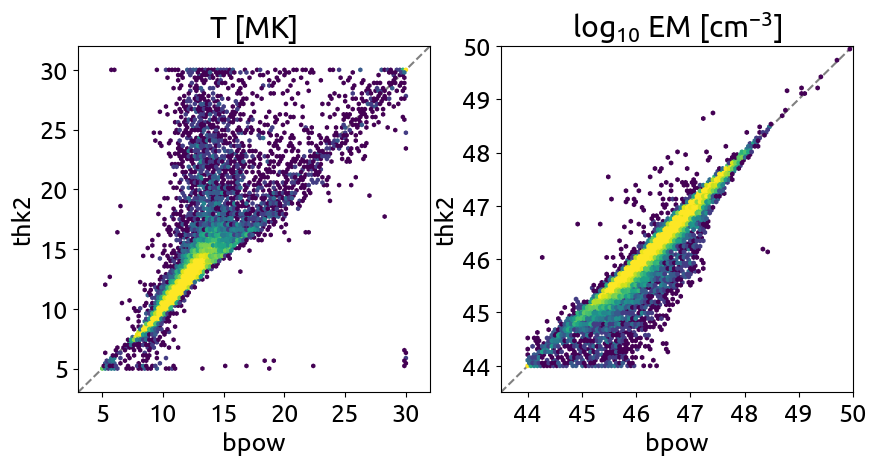

In [8]:
gs=100
vmax=50
tmkr=[3,32]
emr=[43.5,50]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk_b05[:np.count_nonzero(tmk_t05)],tmk_t05[:np.count_nonzero(tmk_t05)],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('bpow')
axs[0].set_ylabel('thk2')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_b05[:np.count_nonzero(tmk_t05)]),np.log10(em_t05[:np.count_nonzero(tmk_t05)]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('bpow')
axs[1].set_ylabel('thk2')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
plt.show()

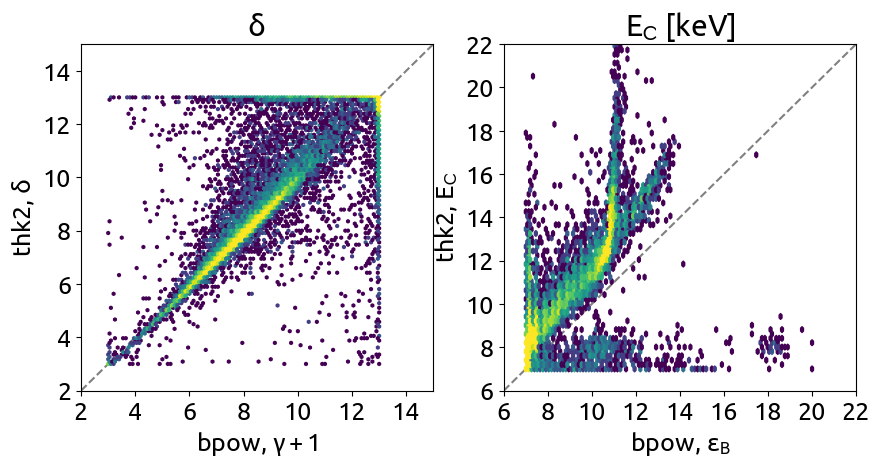

In [9]:
gs=100
vmax=50
delr=[2,15]
ecr=[6,22]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(gam_b05[:np.count_nonzero(tmk_t05)]+1,del_t05[:np.count_nonzero(tmk_t05)],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('$\delta$ ')
axs[0].set_xlim(delr)
axs[0].set_ylim(delr)
axs[0].set_xlabel('bpow, $\gamma+1$')
axs[0].set_ylabel('thk2, $\delta$')
axs[0].plot(delr,delr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=7)
hex09=axs[1].hexbin(eb_b05[:np.count_nonzero(tmk_t05)],ec_t05[:np.count_nonzero(tmk_t05)],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('E$_\mathrm{C}$ [keV]')
axs[1].set_xlim(ecr)
axs[1].set_ylim(ecr)
axs[1].set_xlabel('bpow, $\epsilon_\mathrm{B}$')
axs[1].set_ylabel('thk2, E$_\mathrm{C}$')
axs[1].plot(ecr,ecr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=8)
plt.show()

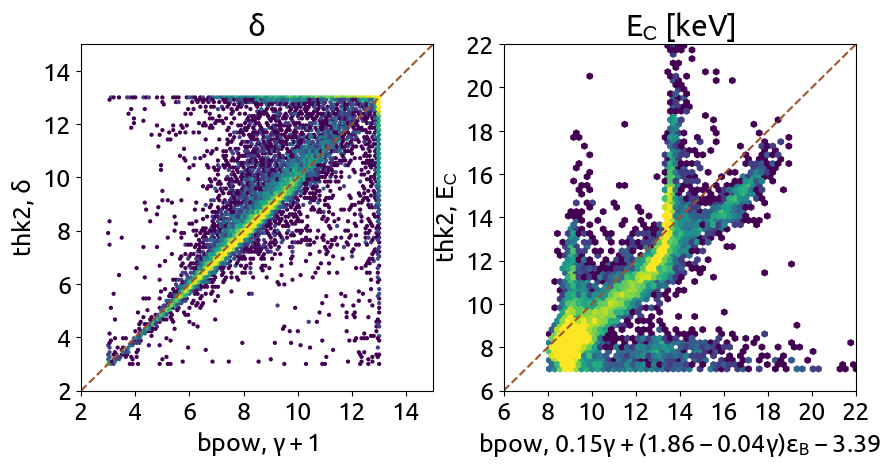

In [10]:
def ebtoec(eb,gam):
    return 0.15*gam+(1.86-0.04*gam)*eb-3.39
gs=100
vmax=50
delr=[2,15]
ecr=[6,22]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(gam_b05[:np.count_nonzero(tmk_t05)]+1,del_t05[:np.count_nonzero(tmk_t05)],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('$\delta$ ')
axs[0].set_xlim(delr)
axs[0].set_ylim(delr)
axs[0].set_xlabel('bpow, $\gamma+1$')
axs[0].set_ylabel('thk2, $\delta$')
axs[0].plot(delr,delr,'--',color='sienna',zorder=1)
axs[0].locator_params(axis='both',nbins=7)
ecg_b05=ebtoec(eb_b05[:np.count_nonzero(tmk_t05)],gam_b05[:np.count_nonzero(tmk_t05)])
hex09=axs[1].hexbin(ecg_b05,ec_t05[:np.count_nonzero(tmk_t05)],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('E$_\mathrm{C}$ [keV]')
axs[1].set_xlim(ecr)
axs[1].set_ylim(ecr)
axs[1].set_xlabel('bpow, $0.15\gamma+(1.86-0.04\gamma)\epsilon_\mathrm{B}-3.39$')
axs[1].set_ylabel('thk2, E$_\mathrm{C}$')
axs[1].plot(ecr,ecr,'--',color='sienna',zorder=1)
axs[1].locator_params(axis='both',nbins=8)
plt.show()

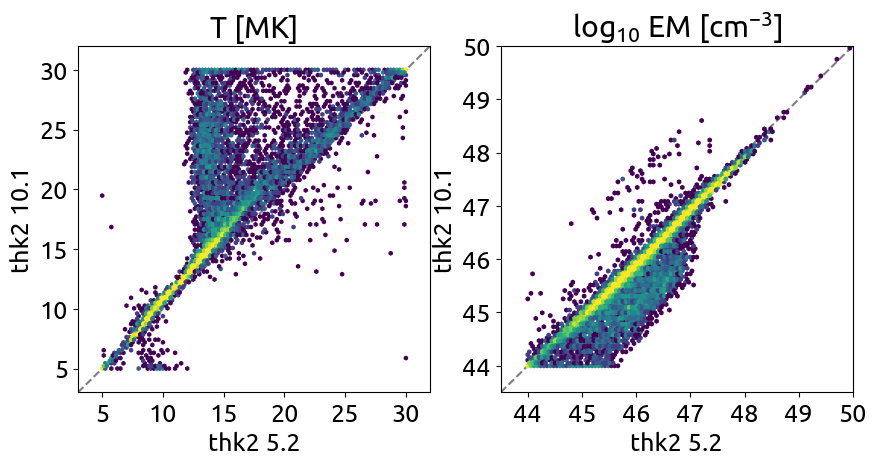

In [11]:
gs=100
vmax=50
tmkr=[3,32]
emr=[43.5,50]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk_t05[:np.count_nonzero(tmk_t10)],tmk_t10[:np.count_nonzero(tmk_t10)],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('thk2 5.2')
axs[0].set_ylabel('thk2 10.1')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_t05[:np.count_nonzero(tmk_t10)]),np.log10(em_t10[:np.count_nonzero(tmk_t10)]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('thk2 5.2')
axs[1].set_ylabel('thk2 10.1')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
plt.show()

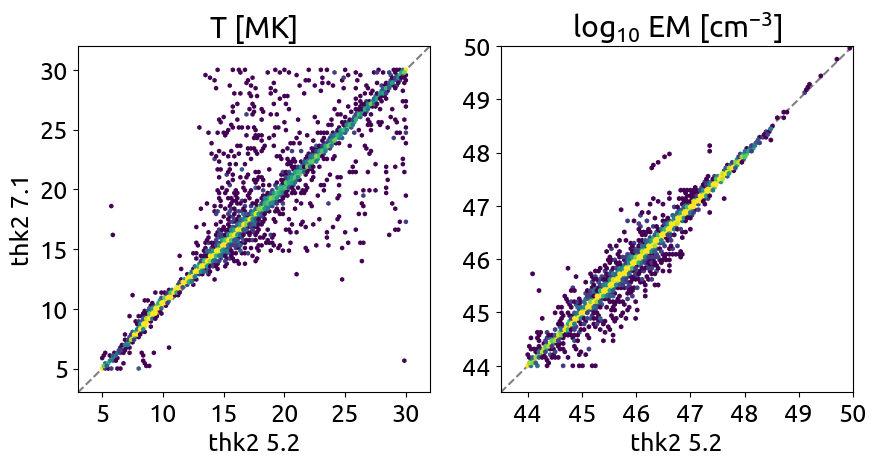

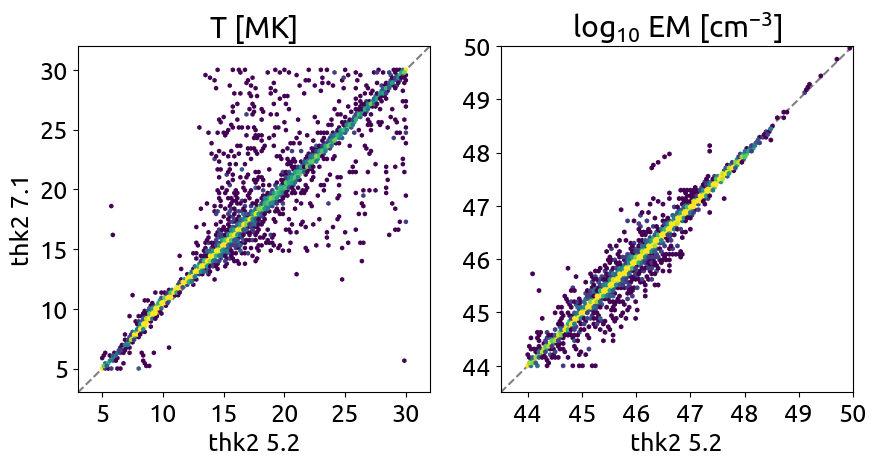

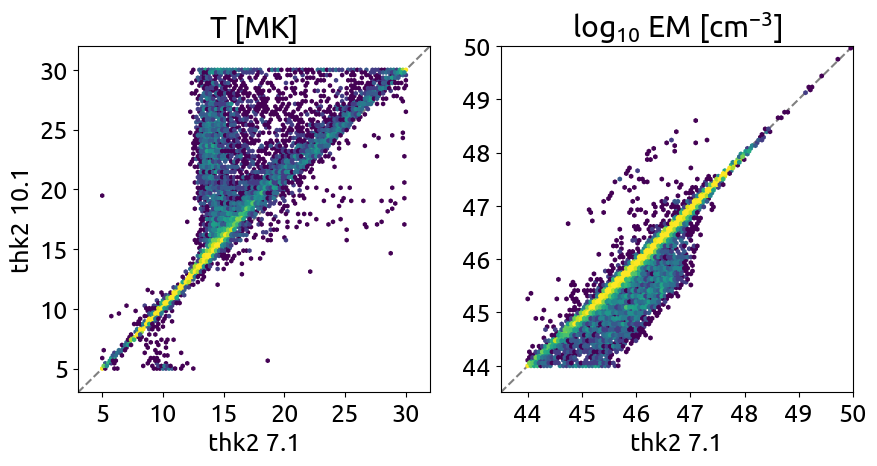

In [12]:
gs=100
vmax=50
tmkr=[3,32]
emr=[43.5,50]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk_t05,tmk_t07,\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('thk2 5.2')
axs[0].set_ylabel('thk2 7.1')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_t05),np.log10(em_t07),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('thk2 5.2')
# axs[1].set_ylabel('thk2 7.1')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
plt.show()

gs=100
vmax=50
tmkr=[3,32]
emr=[43.5,50]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk_t07,tmk_t10,\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('thk2 7.1')
axs[0].set_ylabel('thk2 10.1')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_t07),np.log10(em_t10),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('thk2 7.1')
# axs[1].set_ylabel('thk2 10.1')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
plt.show()

In [13]:
res=read_genx('../wee_2008/wee_all_v2.genx')

In [14]:
idgdth=res["SAVEGEN0"]["IDGDTH"]
idgdnn=res["SAVEGEN0"]["IDGDNN"]
idgsgdth=res["SAVEGEN0"]["IDGSGDTH"]
idgsgdnn=res["SAVEGEN0"]["IDGSGDNN"]
tmk=res["SAVEGEN0"]["TMK"]
em=res["SAVEGEN0"]["EM"]
norm=res["SAVEGEN0"]["NORM"]
eb=res["SAVEGEN0"]["EB"]
g2=res["SAVEGEN0"]["G2"]

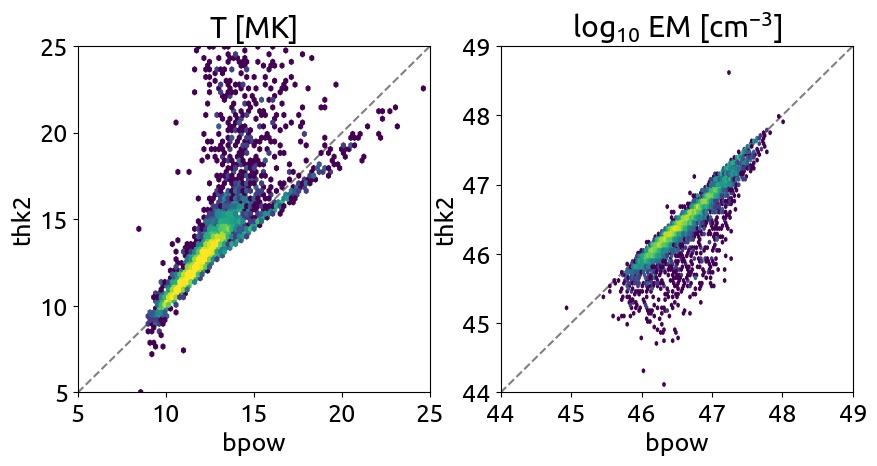

In [15]:
gs=100
vmax=50
tmkr=[5,25]
emr=[44,49]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk_b05[idgsgdth],tmk_t05[idgsgdth],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('bpow')
axs[0].set_ylabel('thk2')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_b05[idgsgdth]),np.log10(em_t05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('bpow')
axs[1].set_ylabel('thk2')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
plt.show()

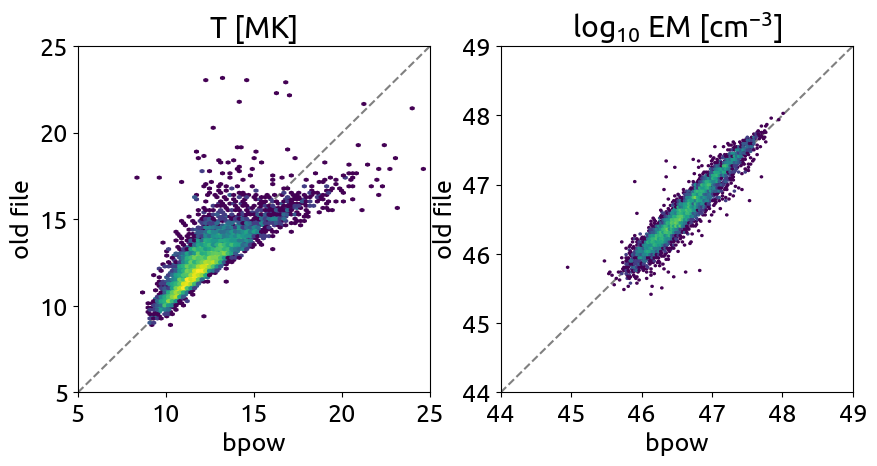

In [16]:
gs=100
vmax=50
tmkr=[5,25]
emr=[44,49]
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
hex07=axs[0].hexbin(tmk_b05[idgsgdth],tmk[idgsgdth],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('bpow')
axs[0].set_ylabel('old file')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_b05[idgsgdth]),np.log10(em[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('bpow')
axs[1].set_ylabel('old file')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
plt.show()

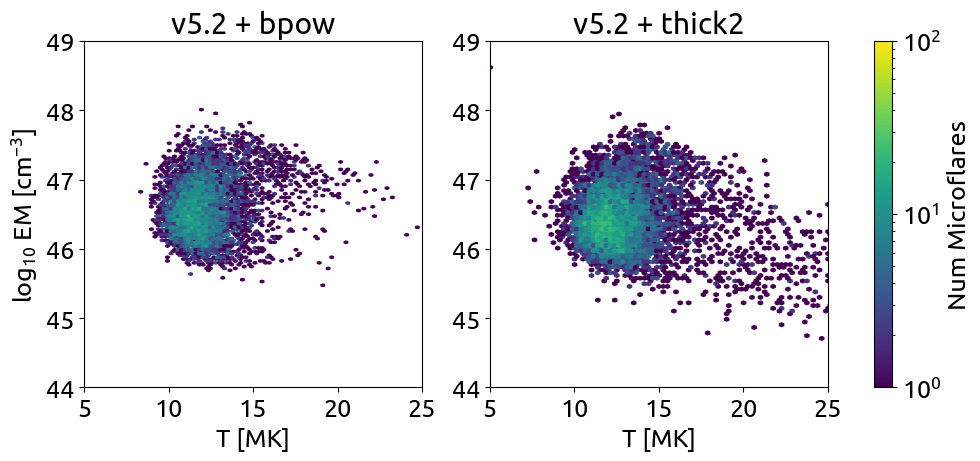

In [17]:
gs=100
vmax=100
tmkr=[5,25]
emr=[44,49]
fig,axs=plt.subplots(1,2,figsize=(12,4.5))
hex07=axs[0].hexbin(tmk_b05[idgsgdth],np.log10(em_b05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('v5.2 + bpow')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(emr)
axs[0].set_xlabel('T [MK]')
axs[0].set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
axs[0].locator_params(axis='both',nbins=6)

hex09=axs[1].hexbin(tmk_t05[idgsgdth],np.log10(em_t05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('v5.2 + thick2')
axs[1].set_xlabel('T [MK]')
# axs[1].set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(tmkr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('T [MK]')
axs[1].locator_params(axis='both',nbins=7)
fig.colorbar(hex09, ax=axs.ravel().tolist(),label='Num Microflares')

plt.show()

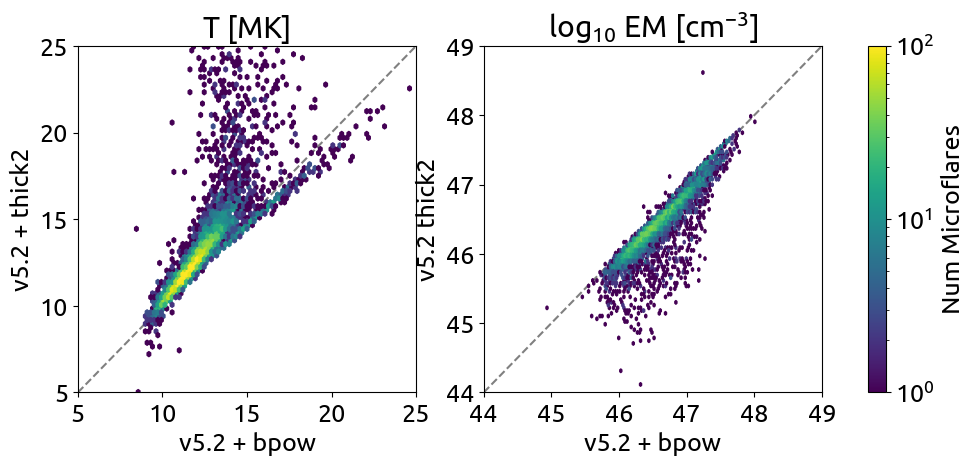

In [18]:
gs=100
vmax=100
tmkr=[5,25]
emr=[44,49]
fig,axs=plt.subplots(1,2,figsize=(12,4.5))
hex07=axs[0].hexbin(tmk_b05[idgsgdth],tmk_t05[idgsgdth],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_title('T [MK]')
axs[0].set_xlim(tmkr)
axs[0].set_ylim(tmkr)
axs[0].set_xlabel('v5.2 + bpow')
axs[0].set_ylabel('v5.2 + thick2')
axs[0].plot(tmkr,tmkr,'--',color='grey',zorder=0)
axs[0].locator_params(axis='both',nbins=6)
hex09=axs[1].hexbin(np.log10(em_b05[idgsgdth]),np.log10(em_t05[idgsgdth]),\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_title('log$_{10}$ EM [cm$^{-3}$]')
axs[1].set_xlim(emr)
axs[1].set_ylim(emr)
axs[1].set_xlabel('v5.2 + bpow')
axs[1].set_ylabel('v5.2 thick2')
axs[1].plot(emr,emr,'--',color='grey',zorder=0)
axs[1].locator_params(axis='both',nbins=7)
fig.colorbar(hex09, ax=axs.ravel().tolist(),label='Num Microflares')
plt.show()

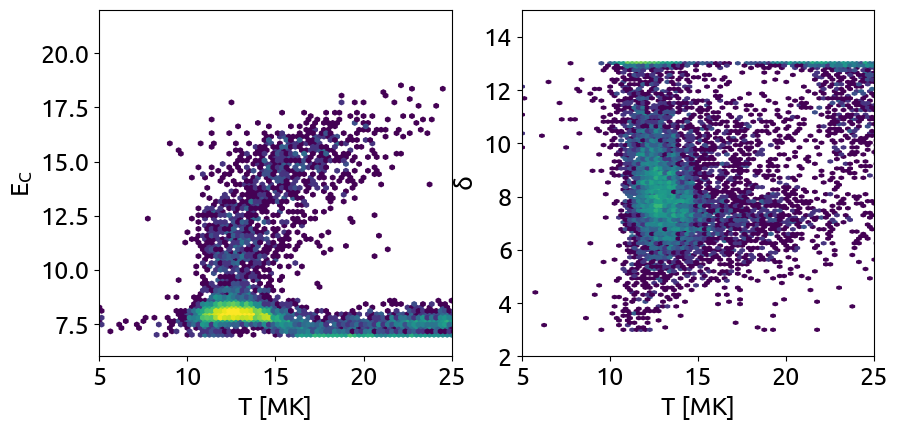

In [25]:
fig,axs=plt.subplots(1,2,figsize=(10,4.5))
tmkr=[5,25]
ecr=[6,22]
delr=[2,15]
hex07=axs[0].hexbin(tmk_t10[idgdth],ec_t10[idgdth],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_xlim(tmkr)
axs[0].set_ylim(ecr)
axs[0].set_xlabel('T [MK]')
axs[0].set_ylabel(r'E$_C$')
axs[0].locator_params(axis='both',nbins=7)

hex09=axs[1].hexbin(tmk_t10[idgdth],del_t10[idgdth],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_xlim(tmkr)
axs[1].set_ylim(delr)
axs[1].set_xlabel('T [MK]')
axs[1].set_ylabel('$\delta$')
axs[1].locator_params(axis='both',nbins=7)
plt.show()

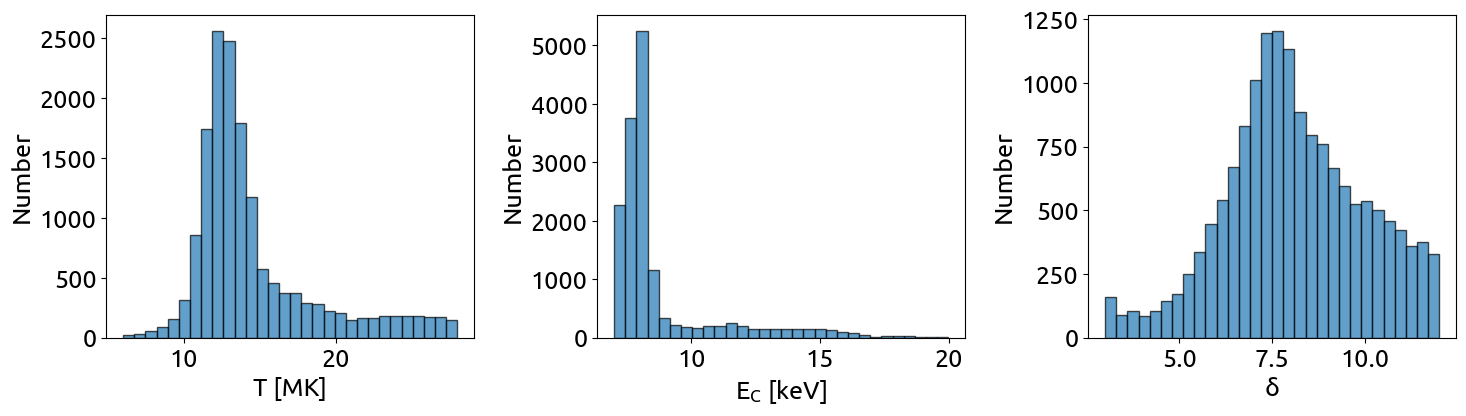

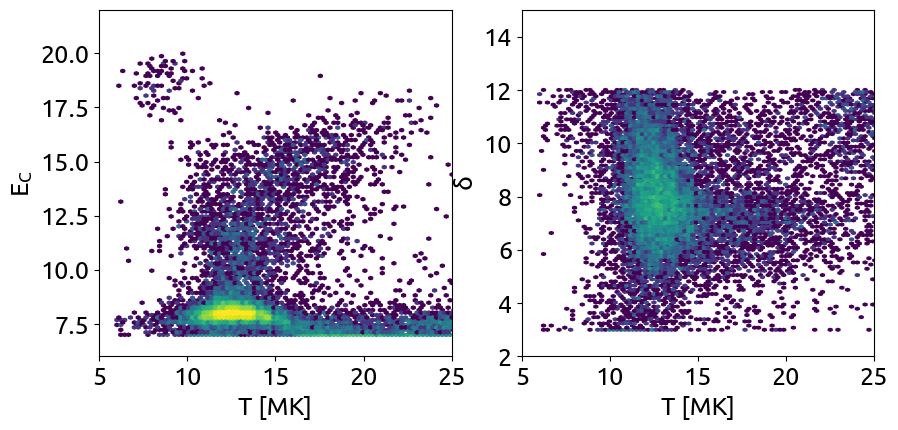

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4.5))


gd=(tmk_t10 > 6) & (tmk_t10 <28) & (del_t10 < 12) & (ec_t10 < 20)
# Panel 1: T [MK]
axs[0].hist(tmk_t10[gd], bins=30, edgecolor='black', alpha=0.7)
axs[0].set_xlabel('T [MK]')
axs[0].set_ylabel('Number')

# Panel 2: E_C [keV]
axs[1].hist(ec_t10[gd], bins=30, edgecolor='black', alpha=0.7)
axs[1].set_xlabel('E$_C$ [keV]')
axs[1].set_ylabel('Number')

# Panel 3: delta
axs[2].hist(del_t10[gd], bins=30, edgecolor='black', alpha=0.7)
axs[2].set_xlabel('$\delta$')
axs[2].set_ylabel('Number')

plt.tight_layout()
plt.show()


fig,axs=plt.subplots(1,2,figsize=(10,4.5))
tmkr=[5,25]
ecr=[6,22]
delr=[2,15]
hex07=axs[0].hexbin(tmk_t10[gd],ec_t10[gd],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_xlim(tmkr)
axs[0].set_ylim(ecr)
axs[0].set_xlabel('T [MK]')
axs[0].set_ylabel(r'E$_C$')
axs[0].locator_params(axis='both',nbins=7)

hex09=axs[1].hexbin(tmk_t10[gd],del_t10[gd],\
                    gridsize=gs,cmap='viridis',norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_xlim(tmkr)
axs[1].set_ylim(delr)
axs[1].set_xlabel('T [MK]')
axs[1].set_ylabel('$\delta$')
axs[1].locator_params(axis='both',nbins=7)
plt.show()